In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [3]:
# Listing 4.1 Hold-out validation (無法執行 -- lack of data)

num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
# 可調節模型、重新訓練、評估，然後再次調節…
model = get_model()
model.train(np.concatenate([training_data, validation_data]))
test_score = model.evaluate(test_data)


NameError: name 'data' is not defined

In [4]:
# Listing 4.2 K-fold cross-validation -- 應該無法執行 --

k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    training_data = data[:num_validation_samples * fold] +
    data[num_validation_samples * (fold + 1):]
    
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)

validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)


SyntaxError: invalid syntax (<ipython-input-4-1d39de2df539>, line 10)

In [5]:
# Listing 3.1 Loading the IMDB dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

# Listing 3.2 Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


17464789/17464789 [==============================] - 41s 2us/step


In [6]:
# Listing 4.3 Original model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
# Listing 4.4 Version of the model with lower capacity
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Listing 4.5 Version of the model with higher capacity
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# Listing 4.8 Adding dropout to the IMDB network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [10]:
#=== 以下程式碼來自第3章，用來重新計算及顯示採用新參數的結果 ===#
# Listing 3.4 Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Listing 3.5 Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Listing 3.6 Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# Listing 3.7 Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Listing 3.8 Training your model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


/home/earvin/anaconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
# 開始訓練 (但是會死在這一段)
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6651 - acc: 0.5801 - val_loss: 0.6060 - val_acc: 0.8058
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5850 - acc: 0.6967 - val_loss: 0.4989 - val_acc: 0.8645
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5102 - acc: 0.7622 - val_loss: 0.4133 - val_acc: 0.8743
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4444 - acc: 0.8095 - val_loss: 0.3582 - val_acc: 0.8797
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3943 - acc: 0.8456 - val_loss: 0.3193 - val_acc: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3394 - acc: 0.8735 - val_loss: 0.2889 - val_acc: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3029 - acc: 0.8922 - val_loss: 0.2937 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2760 - a

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

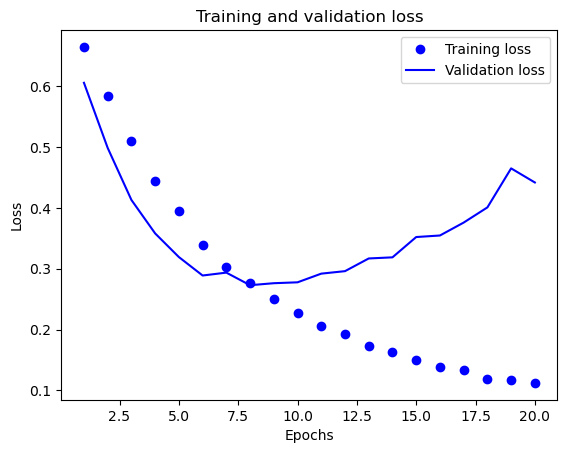

In [13]:
# Listing 3.9 Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# §代碼清單 3-2
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [15]:
# §4.3 原始模型 (method 1)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [16]:
# §4.3 原始模型  (method 1)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5358 - accuracy: 0.7913 - val_loss: 0.4355 - val_accuracy: 0.8573
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3705 - accuracy: 0.8863 - val_loss: 0.3543 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2947 - accuracy: 0.9067 - val_loss: 0.3179 - val_accuracy: 0.8808
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2497 - accuracy: 0.9179 - val_loss: 0.2952 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2186 - accuracy: 0.9287 - val_loss: 0.2843 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1955 - accuracy: 0.9377 - val_loss: 0.2814 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1767 - accuracy: 0.9447 - val_loss: 0.2984 - val_accuracy: 0.8789
Epoch 8/20
30

<ipython-input-17-644a8309eb36>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
<ipython-input-17-644a8309eb36>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


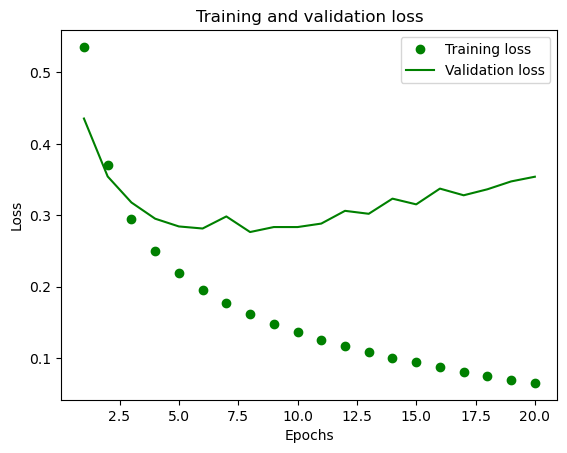

In [17]:
# §4.3 原始模型  (method 1)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [18]:
# §4.4 容量更小的模型 (method 2)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [19]:
# §4.4 容量更小的模型 (method 2)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# §代碼清單 3-8 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6143 - accuracy: 0.7528 - val_loss: 0.5416 - val_accuracy: 0.8467
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4741 - accuracy: 0.8777 - val_loss: 0.4379 - val_accuracy: 0.8693
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3752 - accuracy: 0.9025 - val_loss: 0.3819 - val_accuracy: 0.8691
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3091 - accuracy: 0.9161 - val_loss: 0.3337 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2617 - accuracy: 0.9271 - val_loss: 0.3065 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2275 - accuracy: 0.9359 - val_loss: 0.2890 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2000 - accuracy: 0.9426 - val_loss: 0.2795 - val_accuracy: 0.8880
Epoch 8/20
30/3

<ipython-input-20-e0ae1a5ac634>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
<ipython-input-20-e0ae1a5ac634>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


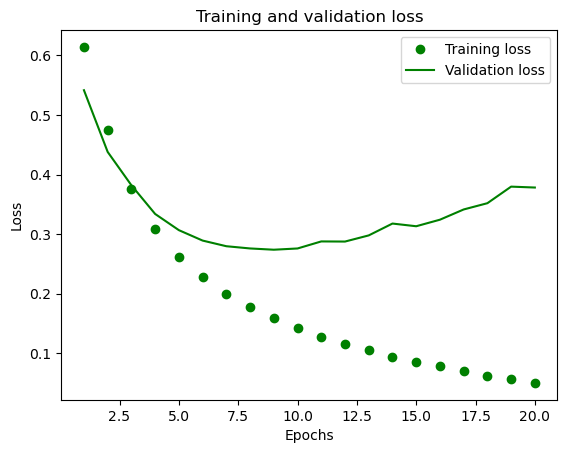

In [20]:
# §4.4 容量更小的模型 (method 2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [21]:
# §4.4 容量更大的模型 (method 3)

from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [23]:
# §4.4 容量更大的模型 (method 3)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 78ms/step - loss: 1.4584e-04 - accuracy: 1.0000 - val_loss: 0.7385 - val_accuracy: 0.8812
Epoch 2/20
30/30 [==============================] - 2s 71ms/step - loss: 1.2762e-04 - accuracy: 1.0000 - val_loss: 0.7501 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 2s 79ms/step - loss: 1.1305e-04 - accuracy: 1.0000 - val_loss: 0.7585 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 1.0100e-04 - accuracy: 1.0000 - val_loss: 0.7661 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 2s 75ms/step - loss: 9.1739e-05 - accuracy: 1.0000 - val_loss: 0.7732 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 2s 69ms/step - loss: 8.3592e-05 - accuracy: 1.0000 - val_loss: 0.7827 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 2s 70ms/step - loss: 7.6900e-05 - accuracy: 1.0000 - val_loss: 0.7882 - val_ac

<ipython-input-24-ef302bc70494>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
<ipython-input-24-ef302bc70494>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')


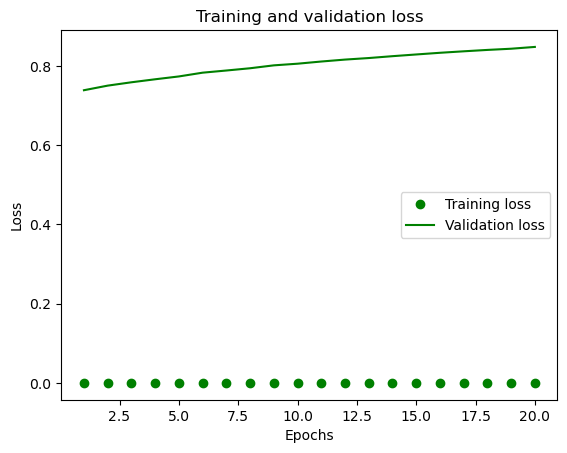

In [24]:
# §4.4 容量更大的模型 (method 3)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='green', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# §4.6 向模型添加L2權重正則化

from keras import regularizers

model = models.Sequential()

# §4.7 Keras中不同的權重正則化項
# kernel_regularizer=regularizers.l2(0.01)
# kernel_regularizer=regularizers.l1(00.01)
# kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# §代碼清單 3-4
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [26]:
# §代碼清單 3-8 (§4.6 L2)
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6957 - accuracy: 0.7669 - val_loss: 0.5558 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4836 - accuracy: 0.8931 - val_loss: 0.4808 - val_accuracy: 0.8698
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3995 - accuracy: 0.9153 - val_loss: 0.4284 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3512 - accuracy: 0.9289 - val_loss: 0.4101 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3186 - accuracy: 0.9367 - val_loss: 0.4074 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2942 - accuracy: 0.9458 - val_loss: 0.3981 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2766 - accuracy: 0.9505 - val_loss: 0.4005 - val_accuracy: 0.8833
Epoch 8/20
30

<ipython-input-27-af80d9ddbc1f>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
<ipython-input-27-af80d9ddbc1f>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


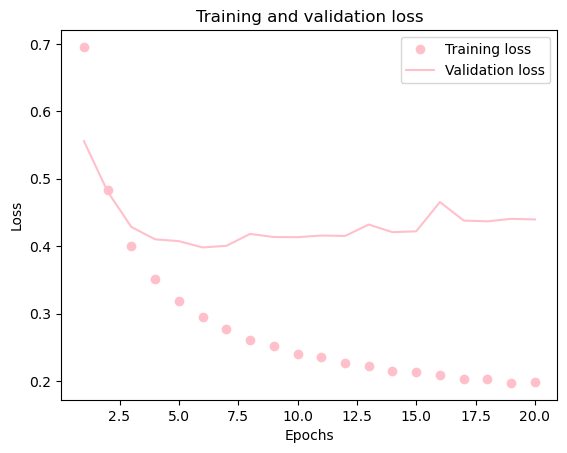

In [27]:
# §代碼清單 3-9 (§4.6 L2)
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
# §代碼清單 4-8 向IMDB網路中添加dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [29]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 01 --
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6548 - accuracy: 0.6035 - val_loss: 0.6001 - val_accuracy: 0.8115
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5772 - accuracy: 0.7220 - val_loss: 0.5080 - val_accuracy: 0.8598
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5111 - accuracy: 0.7707 - val_loss: 0.4145 - val_accuracy: 0.8726
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4504 - accuracy: 0.8125 - val_loss: 0.3613 - val_accuracy: 0.8797
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4000 - accuracy: 0.8418 - val_loss: 0.3223 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3626 - accuracy: 0.8601 - val_loss: 0.2995 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3158 - accuracy: 0.8823 - val_loss: 0.2857 - val_accuracy: 0.8896
Epoch 8/20
30

<ipython-input-30-068549b08265>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
<ipython-input-30-068549b08265>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')


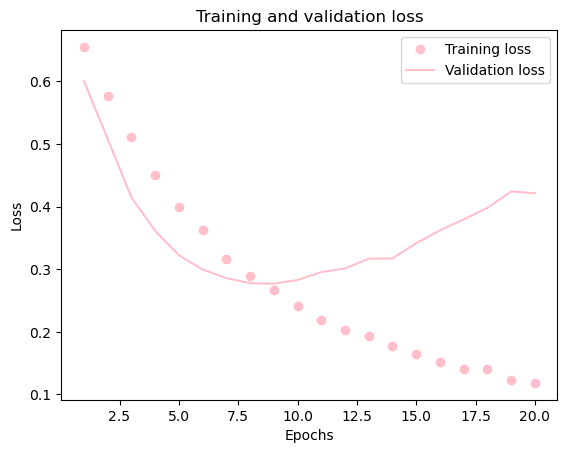

In [30]:
# §代碼清單 4-8 向IMDB網路中添加dropout -- CONTINUE 02 --
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy'] #<----Add this line and the program should graph correctly!

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', color='pink', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', color='pink', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
